<a href="https://colab.research.google.com/github/ManuelJervi98/tarea1/blob/main/25_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install wordcloud -q

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [6]:
df['label'][0]

'ham'

In [9]:
grupeado = df.groupby('label').count()
grupeado

,email
label,
ham,4358
spam,1496


<Axes: >

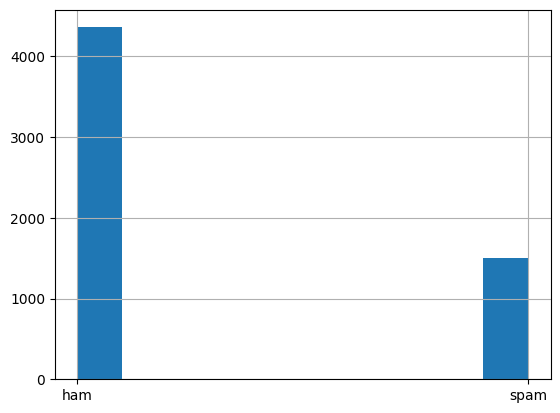

In [10]:
df['label'].hist()

In [12]:
df['b_labels'] = df["label"].map({'ham':0, 'spam': 1})

Y = df['b_labels'].to_numpy()

df

,email,label,b_labels
0,Subject: re : rankings\nthank you .,ham,0
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham,0
2,Subject: research group move to the 19 th floo...,ham,0
3,Subject: christmas baskets\nthe christmas bask...,ham,0
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham,0
...,...,...,...
5849,"Subject: tetm : 22 , interest : 3 . 55 %\nha h...",spam,1
5850,"Subject: localized software , all languages av...",spam,1
5851,Subject: instant branded software download\nso...,spam,1
5852,"Subject: localized software , all languages av...",spam,1


In [14]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
df_train, df_test, Ytrain, Ytest = train_test_split(df["email"], Y, test_size=0.33)

In [19]:
df_train

1005    Subject: re : australian energy risk 2000\nluc...
1568    Subject: re : ( no subject )\nthanks vince .\n...
3246    Subject: wharton interviews\n- - - - - - - - -...
2122    Subject: re : comments\nhi vince ,\nsorry to h...
3879    Subject: option visualization\nvince and stins...
                              ...                        
260     Subject: revised 10 cpm color copier informati...
4703    Subject: are you losing ? the answer would ama...
286     Subject: fortune most admired ranking\ncongrat...
197     Subject: re : spreadsheet for george posey\nvi...
3071    Subject: houston trip\nhi jaideep !\nmy first ...
Name: email, Length: 3922, dtype: object

In [21]:
df_test

575     Subject: oracle nt client software upgrade - m...
1031    Subject: friday off\n- - - - - - - - - - - - -...
3685    Subject: introducing the new iijournals online...
1686    Subject: re : white wall board\nanita ,\nno pr...
5737    Subject: delivery notification for\nthis is a ...
                              ...                        
3554    Subject: fw : resume for vince kaminski\nvince...
123     Subject: congrats\ncongratulations on your pro...
5700    Subject: returned mail : see transcript for de...
1590    Subject: i wanted to give you some feedback . ...
77      Subject: re : re : conference volume\nhi vince...
Name: email, Length: 1932, dtype: object

In [22]:
vectores = CountVectorizer(decode_error='ignore')
Xtrain = vectores.fit_transform(df_train)
Xtest = vectores.transform(df_test)

In [23]:
Xtrain
Xtrain

<3922x32778 sparse matrix of type '<class 'numpy.int64'>'
	with 484182 stored elements in Compressed Sparse Row format>

In [25]:
modelo = MultinomialNB()
modelo.fit(Xtrain, Ytrain)
print("Train acc:", modelo.score(Xtrain, Ytrain))
print("Train acc:", modelo.score(Xtest, Ytest))

Train acc: 0.9969403365629781
Train acc: 0.9912008281573499


In [26]:
Ptrain=modelo.predict(Xtrain)
Ptest=modelo.predict(Xtest)
print("Train f1:", f1_score(Ytrain, Ptrain))
print("Test f1:", f1_score(Ytest, Ptest))

Train f1: 0.9940417080436941
Test f1: 0.9828801611278952


In [27]:
cm=confusion_matrix(Ytrain, Ptrain)
cm

array([[2909,   11],
       [   1, 1001]])

In [28]:
cm=confusion_matrix(Ytest, Ptest)
cm

array([[1427,   11],
       [   6,  488]])

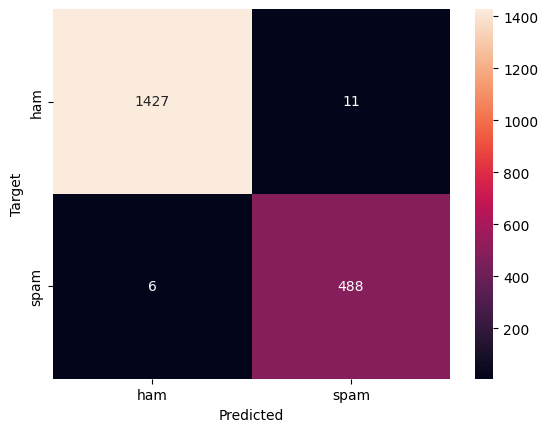

In [36]:
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index = classes, columns=classes)
  ax = sn.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

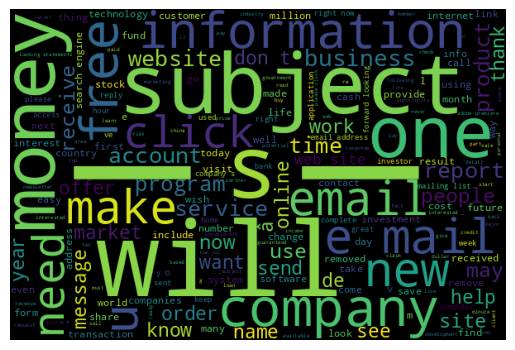

In [35]:
def visualize(label):
  words = ''
  for msg in df[df['label'] == label]['email']:
    msg = msg.lower()
    words += msg + ''
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
visualize('spam')